In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df = pd.read_csv('/home/lung cancer survey.csv')
df.head(5)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [2]:
df1 = df.copy()
df1['GENDER'] = df1.apply(lambda row: 1 if row['GENDER'] == 'M' else 0, axis=1)
df1['LUNG_CANCER'] = df1.apply(lambda row: 1 if row['LUNG_CANCER'] == 'YES' else 0, axis=1)
df2 = df1.copy()

In [3]:
df1.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [4]:
x = df1.drop('LUNG_CANCER', axis='columns')
y = df1['LUNG_CANCER']
x_scaled = preprocessing.StandardScaler().fit(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

# lbfgs, yes
# liblinear,no
# newton-cg,yes
# newton-cholesky,no
# sag,yes
# saga,yes

d = {'lbfgs':0, 'liblinear':0, 'newton-cg':0,  'newton-cholesky':0, 'sag':0, 'saga':0}

for k in d.keys():
  classifier = LogisticRegression(max_iter=100000, solver=k)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x)
  print(f"Accuracy {k}:", accuracy_score(y, y_pred))
  d[k] = accuracy_score(y, y_pred)

classifier = LogisticRegression(max_iter=100000, solver=max(d, key=d.get))
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x)
print(f"Chosen one ",max(d, key=d.get) ,":", accuracy_score(y, y_pred))
d[k] = accuracy_score(y, y_pred)

Accuracy lbfgs: 0.941747572815534
Accuracy liblinear: 0.8867313915857605
Accuracy newton-cg: 0.941747572815534
Accuracy newton-cholesky: 0.941747572815534
Accuracy sag: 0.889967637540453
Accuracy saga: 0.889967637540453
Chosen one  lbfgs : 0.941747572815534


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [10]:
x = df2.drop('LUNG_CANCER', axis=1)
y = df2['LUNG_CANCER']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

sc = StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [11]:
# 'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
# 'max_iter': [50, 100, 150],
# 'activation': ['tanh', 'relu'],
# 'solver': ['sgd', 'adam'],
# 'alpha': [0.0001, 0.05],
# 'learning_rate': ['constant','adaptive'],

clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 6000,
                        activation = 'tanh',
                        alpha = 0.05,
                        solver = 'adam')
clf.fit(trainX_scaled, trainY)


MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(150, 100, 50),
              max_iter=6000)

In [12]:
y_pred = clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.97


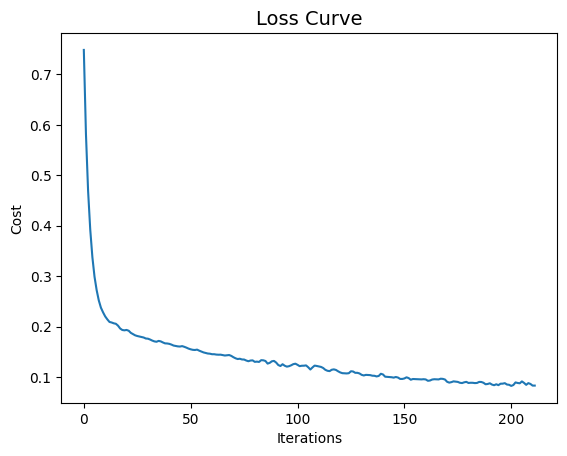

In [13]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()